In [1]:
#!pip install pydataxm

In [2]:
from pydataxm import *
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#objetoAPI = pydataxm.ReadDB() # La API estuvo caida el fin de semana del 10 de junio

Cargamos el dataframe, hacemos format a la fecha y filtramos las columnas de interés.

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/FaSaSu20/MLD6_Proy/master/src/nombre_paquete/database/data.csv") # Cargo otros datos parecidos
df["Fecha"] = pd.to_datetime(df['Fecha'].astype(str), format ='%Y-%m-%d %H:%M:%S')
df = df[["Fecha" ,"AGUA", "CARBON", "GAS", "LIQUIDOS", "PPP Bolsa diario"]]
df

,Fecha,AGUA,CARBON,GAS,LIQUIDOS,PPP Bolsa diario
0,2015-01-01,187.381526,123.225318,204.977354,971.700598,179.685917
1,2015-01-02,179.863045,119.771853,208.442936,971.705305,187.894382
2,2015-01-03,202.829047,123.878501,213.453856,971.381271,201.160360
3,2015-01-04,230.330204,124.526534,212.540171,947.097082,238.800040
4,2015-01-05,205.850445,125.271973,212.464471,979.080505,214.787935
...,...,...,...,...,...,...
2642,2022-03-27,182.604901,262.813092,697.442903,707.583803,249.882042
2643,2022-03-28,198.853818,262.813092,728.107974,707.583803,274.869332
2644,2022-03-29,202.910992,253.749212,709.119964,707.583803,281.697472
2645,2022-03-30,184.610429,258.967234,718.866090,707.583803,282.618263


Tenemos datos desde el primero de enero del 2015 hasta el 31 de marzo del 2022, para un total de 2647 registros, uno por día. Tenemos el precio de las principales energía de generación como variables independientes: Agua, Carbón, Gas y Líquidos (petroléo), la variable objetivo es el valor del precio de bolsa diario.

In [7]:
df.describe()

,AGUA,CARBON,GAS,LIQUIDOS,PPP Bolsa diario
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000
mean,195.504657,158.585494,400.533051,660.783921,224.128882
std,189.632636,26.684211,112.345729,129.374901,195.024597
min,56.209376,85.951348,169.704209,377.156842,61.172757
25%,92.853401,138.128833,337.684705,569.069081,115.651374
50%,131.093969,158.789273,401.306083,648.078142,162.496191
75%,200.713812,175.327640,449.029602,742.263914,251.722811
max,1318.605864,265.948895,816.089919,1035.447323,1942.711893


En la descripción estadistica, se observa la distribución de los datos.

Respecto al agua, se observa una desviación estandar muy cerca a la media, estoy indica que los datos son muy dispersos. El Carbón es el que tiene el precio maximo menor. El Gas y el carbón tiene los valores mas grandes.

Al ser una serie de tiempo, el gráfico pro defecto son los lineplots. Acá ya se puede visualizar las correlaciones individuales entre las variables independientes y la objetivo.

<Axes: xlabel='Fecha', ylabel='PPP Bolsa diario'>

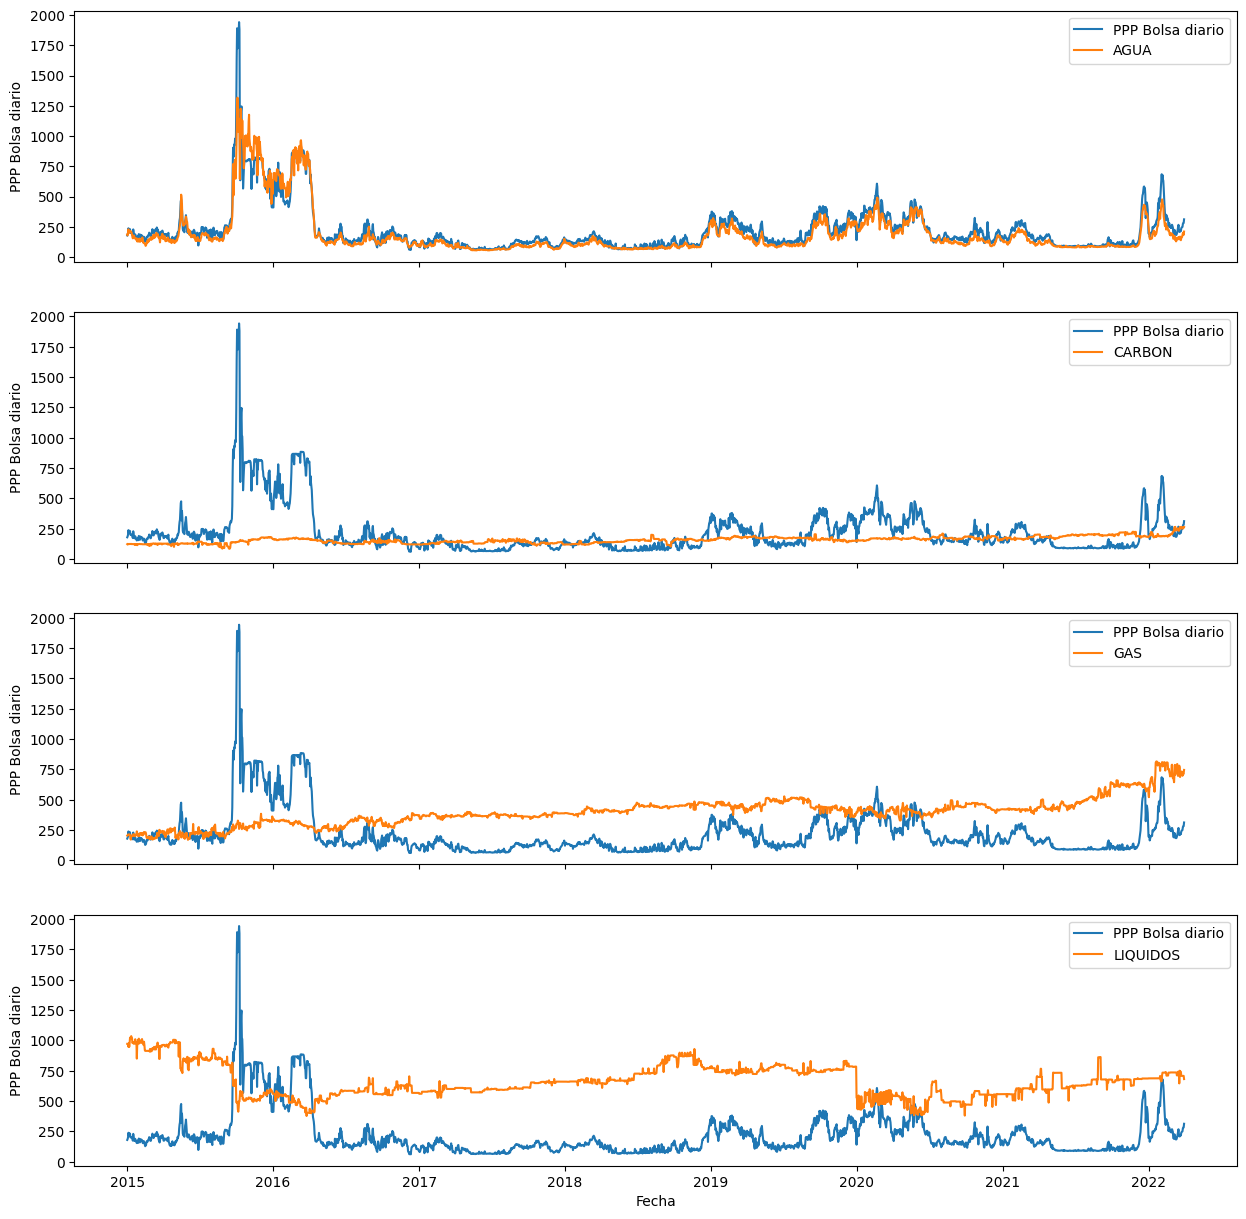

In [8]:
fig, axes = plt.subplots(4, figsize = (15, 15), sharex = True)
sns.lineplot(x = df["Fecha"], y = df["PPP Bolsa diario"], label = "PPP Bolsa diario", ax = axes[0])
sns.lineplot(x = df["Fecha"], y = df["PPP Bolsa diario"], label = "PPP Bolsa diario", ax = axes[1])
sns.lineplot(x = df["Fecha"], y = df["PPP Bolsa diario"], label = "PPP Bolsa diario", ax = axes[2])
sns.lineplot(x = df["Fecha"], y = df["PPP Bolsa diario"], label = "PPP Bolsa diario", ax = axes[3])
sns.lineplot(x = df["Fecha"], y = df["AGUA"], label = "AGUA", ax = axes[0])
sns.lineplot(x = df["Fecha"], y = df["CARBON"], label = "CARBON", ax = axes[1])
sns.lineplot(x = df["Fecha"], y = df["GAS"], label = "GAS", ax = axes[2])
sns.lineplot(x = df["Fecha"], y = df["LIQUIDOS"], label = "LIQUIDOS", ax = axes[3])

<Axes: >

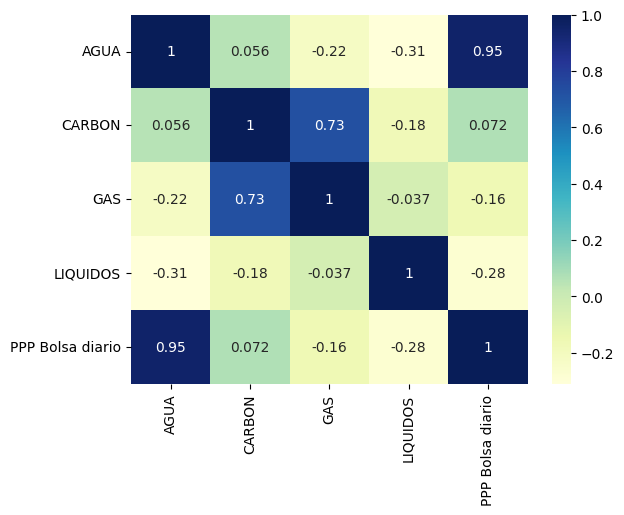

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Se observa como el agua tiene una correlación positiva y alta respecto a la variable objetivo. El carbón tiene una correlación cercana a 0 y el gas junto con los líquidos tienen una correlación negativa.

El comportamiento del agua se evidencia fuertemente en el lineplot.

No se aplicara ninguna tecnica de normalización (por el momento), se trabajara inicialmente con los datos por defecto.

Se clasificaran las variables independientes en x y la variable objetivo en y.

Se usara un train_test_split para dividir el dataset en datos de entrenamiento y de preuba, el objetivo sera, con el 80% de los datos, predecir el otro 20%, respetando que es una serie de tiempo y que los datos son consecutivos.

In [10]:
x = df[["AGUA", "CARBON", "GAS", "LIQUIDOS"]]
y = df[["PPP Bolsa diario"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)